# TalkingData Mobile User Demographics

Active competition found in [kaggle/talkingdata](https://www.kaggle.com/c/talkingdata-mobile-user-demographics)

<img align="left" src="https://kaggle2.blob.core.windows.net/competitions/kaggle/5340/media/TalkingData_banner-265x200.png">

## 1. Explore the data

The total list of files given by the competition and their relationship are:

* gender_age_test.csv .zip (1.05 mb)
* app_labels.csv  .zip (4.04 mb)
* label_categories.csv    .zip (7.67 kb)
* phone_brand_device_model.csv    .zip (2.42 mb)
* sample_submission.csv   .zip (1.32 mb)
* events.csv  .zip (62.24 mb)
* app_events.csv  .zip (211.27 mb)
* gender_age_train.csv    .zip (891.47 kb)

![](https://raw.githubusercontent.com/gxexakis/Kaggle/talking_head/talking_data/data/data_diagram.png)

In [1]:
%matplotlib inline

import seaborn as sb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cd D:/heavy_code/kaggle/talkingdata_competition/

D:\heavy_code\kaggle\talkingdata_competition


### 1.1 Sample answer data

In [3]:
sample = pd.read_csv("input/sample_submission.csv")
sample.head()

,device_id,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
0,1002079943728939269,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
1,-1547860181818787117,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
2,7374582448058474277,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
3,-6220210354783429585,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
4,-5893464122623104785,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833


In [4]:
age_groups = sample.columns.tolist()[1:]
age_groups[6:]

['M22-', 'M23-26', 'M27-28', 'M29-31', 'M32-38', 'M39+']

### 1.2 Gender age train data

In [5]:
gender_age_train = pd.read_csv("input/gender_age_train.csv")
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


It is interesting that the device_id can be negative and positive as well. Also, the train dataset is checked for NaNs.

In [6]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.8+ MB


In [7]:
for col in ["gender","group"]: print col,gender_age_train[col].unique()

gender ['M' 'F']
group ['M32-38' 'M29-31' 'F24-26' 'F33-42' 'F27-28' 'M39+' 'M23-26' 'M27-28'
 'M22-' 'F43+' 'F23-' 'F29-32']


Test if the age groups are the same in the sample file and in the training file:

In [8]:
set(gender_age_train.group.unique())==set(age_groups)

True

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A742860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DC7F0F0>]], dtype=object)

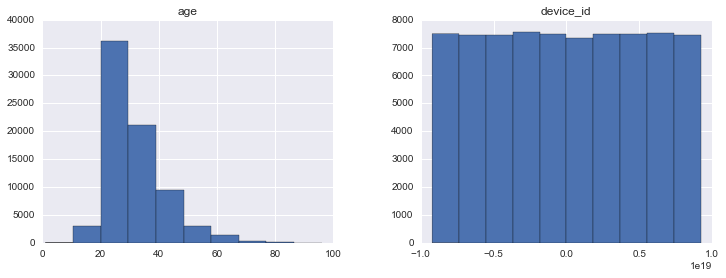

In [9]:
gender_age_train.hist(figsize=(12,4))

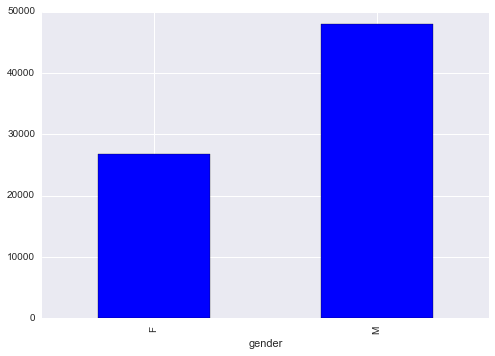

In [10]:
gender_age_train.groupby("gender").count().device_id.plot.bar()

A check is performed to see if the grouping is correct by taking into account the correct ages and gender:

In [11]:
gender_age_train.groupby(["gender","group"]).count()

device_id   age
gender group                  
F      F23-         5050  5050
       F24-26       4190  4190
       F27-28       3118  3118
       F29-32       4628  4628
       F33-42       5561  5561
       F43+         4194  4194
M      M22-         7488  7488
       M23-26       9605  9605
       M27-28       5445  5445
       M29-31       7309  7309
       M32-38       9476  9476
       M39+         8581  8581

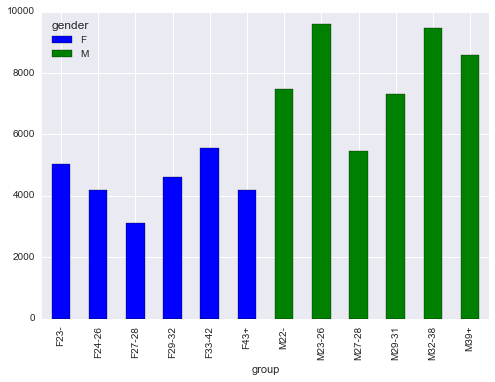

In [12]:
gender_age_train.groupby(["gender","group"]).count()["device_id"].unstack("gender").plot.bar(stacked=True)

Convert gender to integers (0 for Female, 1 for Male) in order to use sklearn methods later 

In [13]:
gender_age_train["genderNum"]=gender_age_train["gender"].map({"F":0,"M":1})

### 1.3 Events data

The data in events is quite big to _always_ store in memory. Maybe we should find another way to keep it!

In [14]:
events = pd.read_csv("input/events.csv")
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66
